In [27]:
import numpy as np #maejo de arreglos algebra lineal
import pandas as pd #manejo dataframes tipo datos
import matplotlib.pyplot as plt #graficas
import seaborn as sns #graficas estadísticAS historioigramsa

In [28]:
## Publicar los datos en la web
url = 'https://docs.google.com/spreadsheets/d/1VLCIafxLq2BUfRE7SSChQHDyRRSIdywLjSAgm65OQUE/pub?output=csv'

hcalculo = pd.read_csv(url)
hcalculo.head(10)

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,25,NaN,NaN,NaN,NaN,NaN,Right,France,ST
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,28,NaN,NaN,NaN,NaN,NaN,Right,Spain,CDM
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,24,NaN,NaN,NaN,NaN,NaN,Left,Norway,ST
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,21,NaN,NaN,NaN,NaN,NaN,Right,England,CAM
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,24,NaN,NaN,NaN,NaN,NaN,Right,Brazil,LW
5,Kevin De Bruyne,90,67,87,94,87,65,78,67,67,...,4,33,NaN,NaN,NaN,NaN,NaN,Right,Belgium,CM
6,Harry Kane,90,65,93,84,83,49,82,64,66,...,3,31,NaN,NaN,NaN,NaN,NaN,Right,England,ST
7,Martin Ødegaard,89,70,82,89,89,67,66,72,69,...,5,25,NaN,NaN,NaN,NaN,NaN,Left,Norway,CM
8,Gianluigi Donnarumma,89,90,84,73,90,52,87,50,55,...,1,25,90.0,84.0,73.0,87.0,90.0,Right,Italy,GK
9,Alisson,89,86,85,85,89,56,90,60,49,...,1,31,86.0,85.0,85.0,90.0,89.0,Right,Brazil,GK


In [29]:
# Ahora extraeremos los datos
x = hcalculo.iloc[:,1:-1].values # "":"" = de todas las filas , 1 = la segunda: -1 = hasta la penultima. "":"" no incluye -1
y = hcalculo.iloc[:,-1].values # "":"" = de todas las columnas, -1 = hasta la última
y

array(['ST', 'CDM', 'ST', ..., 'RB', 'CM', 'CDM'], dtype=object)

In [30]:
datframe = pd.DataFrame(x) # Crear un dataframe a partir de pandas
for col in datframe.columns:
  datframe[col] = pd.to_numeric(datframe[col], errors = "coerce") #cambiar cada columna por un valor numérico


In [31]:
x = datframe.values

array([[91., 97., 90., ..., nan, nan, nan],
       [91., 66., 80., ..., nan, nan, nan],
       [91., 88., 92., ..., nan, nan, nan],
       ...,
       [47., 57., 47., ..., nan, nan, nan],
       [47., 66., 35., ..., nan, nan, nan],
       [47., 56., 34., ..., nan, nan, nan]])

In [32]:
#Crear in imputador
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "median")#Reemplazar los valores nulos con ayuda de la mediana
imputer.fit(x)
x = imputer.transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: [44 45]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


array([[91., 97., 90., ..., 62., 64., 66.],
       [91., 66., 80., ..., 62., 64., 66.],
       [91., 88., 92., ..., 62., 64., 66.],
       ...,
       [47., 57., 47., ..., 62., 64., 66.],
       [47., 66., 35., ..., 62., 64., 66.],
       [47., 56., 34., ..., 62., 64., 66.]])

In [33]:
x_ = x[:,:-1] ## Eligiendo todos los datos excepto ka racnianalidad
x_

array([[91., 97., 90., ..., 63., 62., 64.],
       [91., 66., 80., ..., 63., 62., 64.],
       [91., 88., 92., ..., 63., 62., 64.],
       ...,
       [47., 57., 47., ..., 63., 62., 64.],
       [47., 66., 35., ..., 63., 62., 64.],
       [47., 56., 34., ..., 63., 62., 64.]])

In [34]:
from sklearn.decomposition import PCA
#Crear un objeto PCA (Principal Component Analysis) y ajustar los datos
pca = PCA(n_components=3) #Queremos las tres primeras componentes principales
x_pca = pca.fit_transform(x_)

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42) #se crea un objeto kmeans con las propiedades del algoritmo
clusters = kmeans.fit_predict(x_) # Asingando los datos y otorgandoles etiquetas (4, por número de clusters)
##Investigar método del codo

In [36]:
# Ver centroides
centroides_kmeans = kmeans.cluster_centers_
centroides_kmeans

array([[63.3631424 , 62.27552638, 36.21371972, 49.66900611, 53.74349106,
        61.500566  , 67.22503962, 61.51573466, 62.8637084 , 40.33710663,
        32.49196287, 46.23590672, 33.74100068, 31.48766131, 39.64500792,
        44.30088295, 44.19945664, 33.52411139, 58.32125877, 52.86755717,
        38.54652479, 50.19492868, 57.182024  , 59.182024  , 59.35793525,
        55.87887707, 54.42925062, 60.95766357, 58.89359294, 60.82408875,
        63.31129726, 61.2841295 , 67.70636178, 64.91034639, 69.90378085,
        63.16096898,  2.77586597,  2.04980756, 24.93321259, 65.        ,
        63.        , 62.        , 64.        ],
       [69.71474786, 69.68924833, 58.79181732, 65.67021884, 68.71988582,
        62.64985728, 68.5963844 , 70.2188392 , 69.23311132, 62.88563273,
        56.14500476, 65.56479543, 59.88106565, 51.10352046, 54.16441484,
        65.24129401, 62.73853473, 54.85594672, 69.55756422, 65.9320647 ,
        61.35908658, 67.8114177 , 71.32407231, 71.49324453, 67.19657469,
   

In [37]:
import random

centroides_kmeans_pca = pca.transform(centroides_kmeans)
centroides_kmeans_pca

def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1],
                    hue=clusters, palette='viridis',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()



In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
                         c=clusters, cmap='viridis', s=100,
                         edgecolor='white', alpha=0.6)
# Etiquetas de los ejes y título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir la leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Mostrar el gráfico
    plt.show()


In [41]:
# Definir distancia euclidiana como func
def distancia_euclideana(datos,centroides):
  return np.sqrt(np.sum((datos-centroides)**2))

## Paso 1: Número de Clusters
k = 4 # Por heurística datos y método del codo

## Paso 2: Elección de Centroides
dimension = x_.shape[0] #número de filas
centroids = x_[random.sample(range(dimension),k)]

# Almacenamiento de etiquetas
clusters_manuales = np.zeros(dimension) #Para asignar los valores de cada jugador a un centroide (el más cercano)

# Almacenamiento de distancias
distancias = np.zeros((dimension, k)) #Mide la distancia de cada dato de cada Jugador hacia cada centroide

## Paso 3: Implementación del método y criterios de convergencia
tolerancia = 1e-6
error = 100

#Repetire hasta que los centroides dejen

while error > tolerancia:
  for i in range(dimension): #por cada fila (jugador)
    for j in range(k): #por cada columna
      distancias[i,j] = distancias[i,j] = distancia_euclideana(x_[i], centroids[j])
    clusters_manuales[i] = np.argmin(distancias[i])

  centroids_prev = np.copy(centroids) # Crear variable auxiliar para comparar los centriodes actuales con los anteriores

  #Actualizamos los centroides
  for l in range(k): #Iteramos sobre los clusters
    puntos_cluster = x_[clusters_manuales == l] #Obtenemos todas las etiquetas iguales a l
    #El cluster puede llegar a estar vacío, entonces
    if len(puntos_cluster) > 0:
      centroids[l] = np.mean(puntos_cluster, axis=0)  ### Promedia los puntos que pertenecen al cluster, columna por columna
    else:
      print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
      centroids[l] = x_[np.random.choice(dimension)]

  # Calcular el error como el cambio promedio en los centroides
  error = np.mean([distancia_euclideana(centroids[l], centroids_prev[l]) for l in range(k)])
  print(error)

46.96046171126598
14.61823607647477
11.815877016818797
8.722393952951247
8.877477833888495
9.925526287371985
8.918193908890526
7.281866483670863
5.301511755177225
3.731201959002102
2.6609190273885344
1.8929297226788595
1.2927647943206424
0.910110302229429
0.6703081033836614
0.4453834300983728
0.27807260944066414
0.21750447083086838
0.12806085024769043
0.14096980920625396
0.08539249004300103
0.07500622442598567
0.05769197246487817
0.05165348895197748
0.020862240684936213
0.022853211302601092
0.011932492726138944
0.011625923624257193
0.007381847617203323
0.0


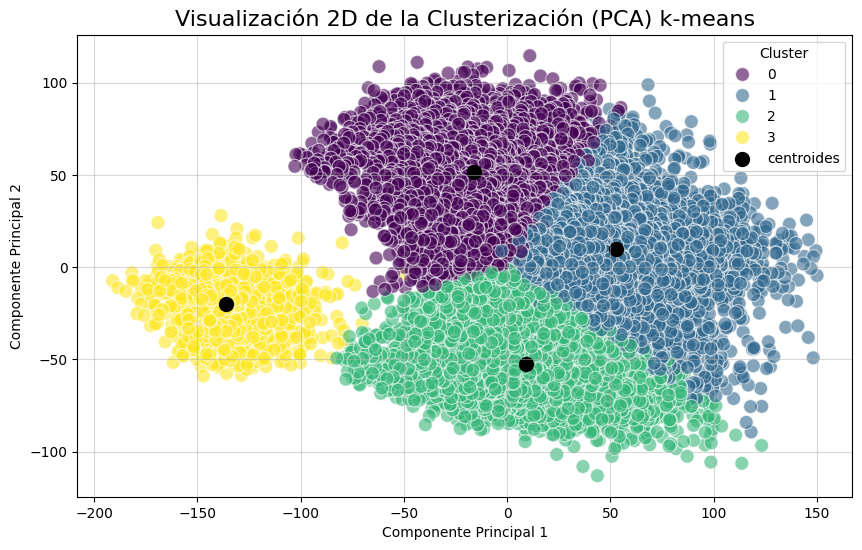

In [44]:
kmeans_euclideana = graficar_clusters_PCA2D(clusters, "k-means", centroides_kmeans_pca)
kmeans_euclideana

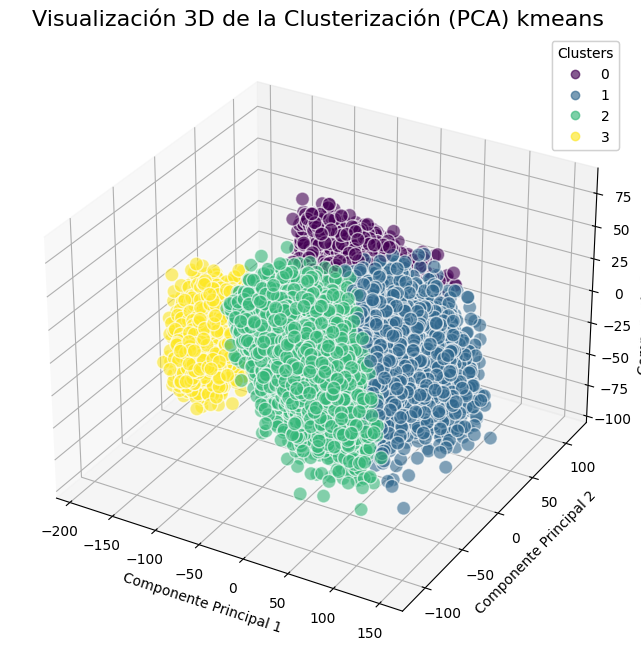

In [45]:
kmeans_euclideana_3D = graficar_clusters_PCA3D(clusters,"kmeans")
kmeans_euclideana_3D